In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\anomaly_pop\Training_data\SIH_24_data.xlsx')

print(df.dtypes)


SNo.                   int64
Time                  object
Male_Population        int64
Female_Population      int64
Sex_Ratio            float64
dtype: object


# 

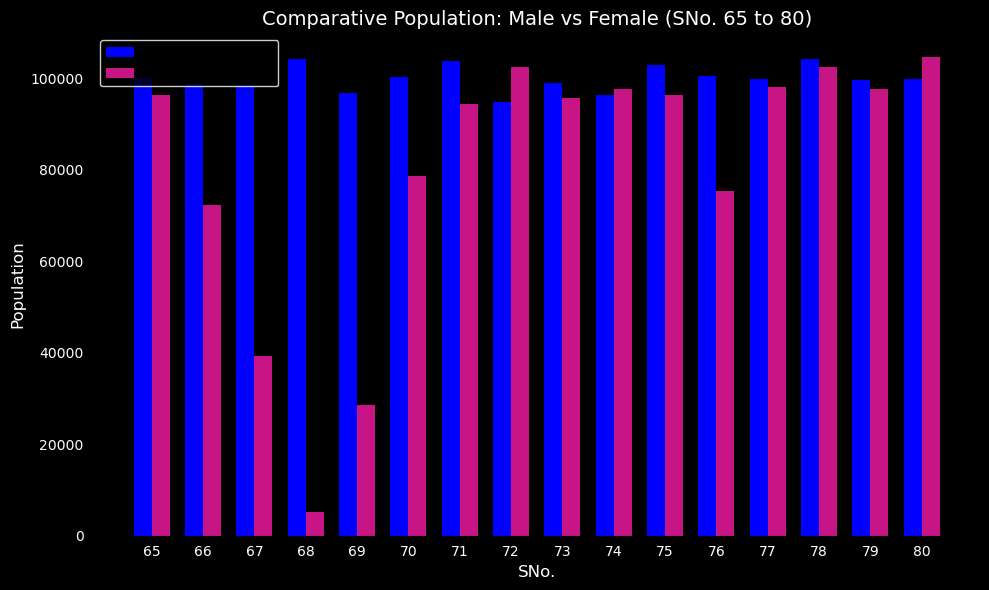

In [2]:
df_filtered = df[(df['SNo.'] >= 65) & (df['SNo.'] <= 80)]

# Set the figure size for better clarity
plt.figure(figsize=(10, 6))

# Get values from the filtered dataframe
x = df_filtered['SNo.']  # X-axis (SNo.)
male_population = df_filtered['Male_Population']  # Y-axis for male population
female_population = df_filtered['Female_Population']  # Y-axis for female population

# Define the width of the bars
bar_width = 0.35

# Create a position for the bars on the X-axis for the male population
r1 = np.arange(len(x))

# Create another position for the female population bars, offset by bar_width
r2 = [i + bar_width for i in r1]

# Plot the bars
plt.bar(r1, male_population, color='blue', width=bar_width, label='Male Population')
plt.bar(r2, female_population, color='#C71585', width=bar_width, label='Female Population')

# Set background color to black
plt.gca().set_facecolor('black')  # Changes the plot background
plt.gcf().patch.set_facecolor('black')  # Changes the surrounding figure background

# Add labels and title (with white color for visibility)
plt.xlabel('SNo.', fontsize=12, color='white')
plt.ylabel('Population', fontsize=12, color='white')
plt.title('Comparative Population: Male vs Female (SNo. 65 to 80)', fontsize=14, color='white')

# Add xticks on the middle of the group bars (with white color)
plt.xticks([r + bar_width/2 for r in range(len(x))], x, color='white')

# Customize Y-ticks as well to be visible on a black background
plt.yticks(color='white')

# Add a legend to differentiate male and female populations (with white text)
plt.legend(facecolor='black', edgecolor='white', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


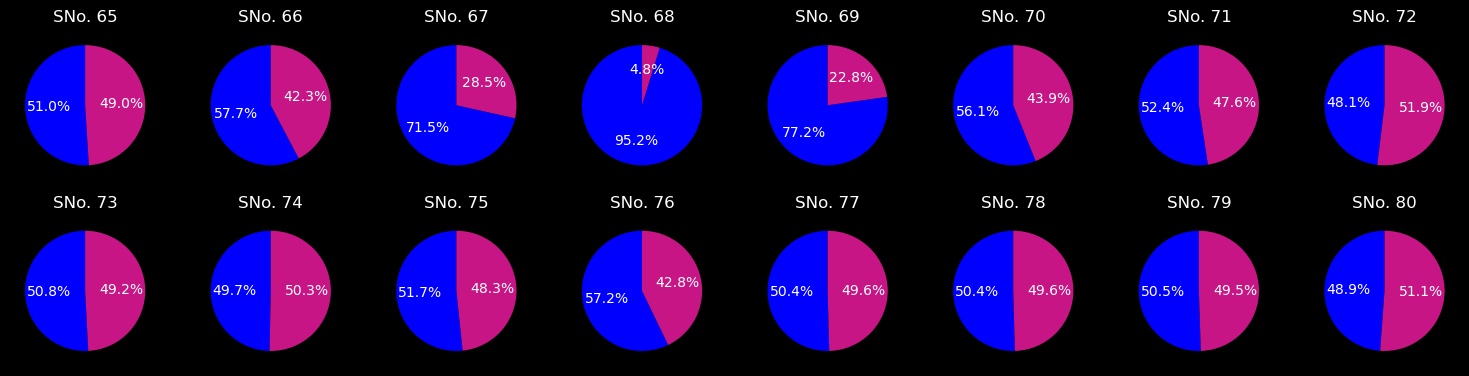

In [3]:

# Filter the DataFrame for SNo. from 65 to 80
df_filtered = df[(df['SNo.'] >= 65) & (df['SNo.'] <= 80)]

# Set the figure size and number of subplots
num_charts = len(df_filtered)
plt.figure(figsize=(15, 15))

# Loop through each row in the filtered DataFrame and create a pie chart for each
for i, row in df_filtered.iterrows():
    # Data for the pie chart
    populations = [row['Male_Population'], row['Female_Population']]
    colors = ['blue', '#C71585']  # Blue for males, dark pink for females

    # Create a subplot for each pie chart
    plt.subplot(8, 8, i - df_filtered.index.min() + 1)  # Adjust position based on number of charts
    
    # Create the pie chart
    plt.pie(populations, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'color': 'white'})
    
    # Set the title for each chart
    plt.title(f'SNo. {row["SNo."]}', color='white')

    # Set the background color to black
    plt.gca().set_facecolor('black')

# Set the figure background to black
plt.gcf().patch.set_facecolor('black')

# Adjust layout for better fit
plt.tight_layout()

# Show the pie charts
plt.show()



C:\Users\DELL\AppData\Local\Temp\ipykernel_11420\410788904.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Sex_Ratio'], shade=True, color='darkviolet')


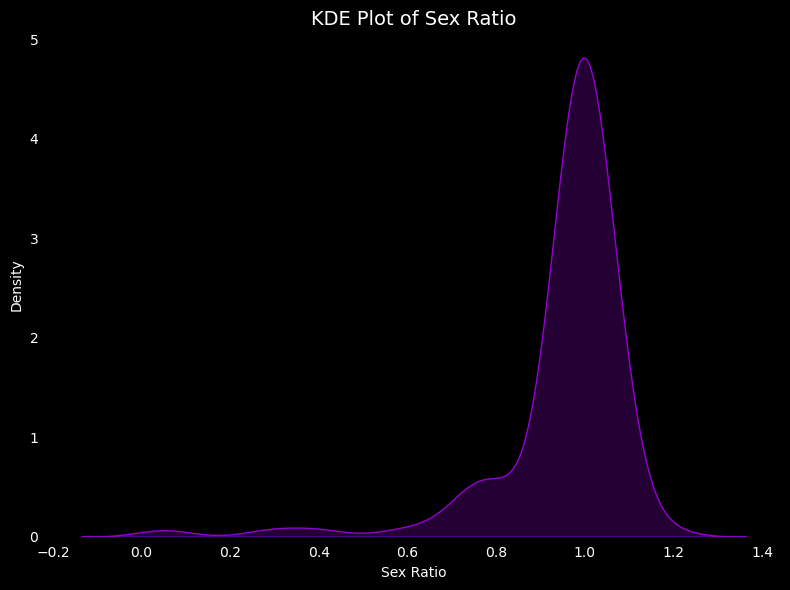

In [4]:
df['Sex_Ratio'] = df['Female_Population'] / df['Male_Population']

plt.figure(figsize=(8, 6))

# Plot the KDE
sns.kdeplot(df['Sex_Ratio'], shade=True, color='darkviolet')

# Set the background color to black
plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')

# Set title and labels in white
plt.title('KDE Plot of Sex Ratio', fontsize=14, color='white')
plt.xlabel('Sex Ratio', color='white')
plt.ylabel('Density', color='white')

# Set the tick labels to white
plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()


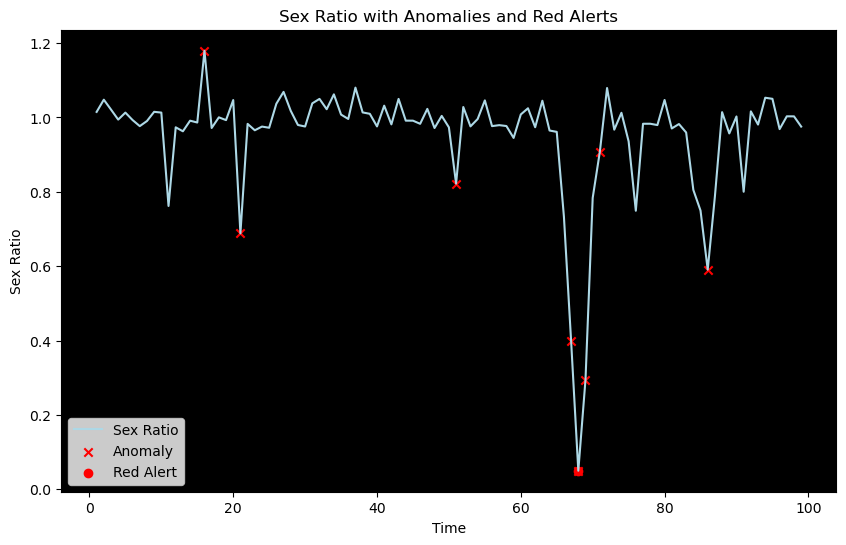

In [5]:
# Isolation Forest Model for Anomaly Detection
iso_forest = IsolationForest(contamination=0.075, random_state=42)
df['Anomaly_Score'] = iso_forest.fit_predict(df[['Sex_Ratio']])

# Flagging Anomalies
df['Anomaly'] = df['Anomaly_Score'] == -1

# Flagging Specific Condition where Population_Female < 5 * Population_Male
df['Extreme_Condition'] = df['Sex_Ratio'] <= 0.1

# Visualize Anomalies and Extreme Conditions
plt.figure(figsize=(10, 6))

ax = plt.axes()
 
# Setting the background color of the plot 
# using set_facecolor() method
ax.set_facecolor("black")

# Plot Sex Ratio
plt.plot(df['SNo.'], df['Sex_Ratio'], label='Sex Ratio', color='lightblue')

# Highlight Anomalies
plt.scatter(df['SNo.'][df['Anomaly']], df['Sex_Ratio'][df['Anomaly']], color='red', label='Anomaly',marker='x')

# Highlight Extreme Conditions
plt.scatter(df['SNo.'][df['Extreme_Condition']], df['Sex_Ratio'][df['Extreme_Condition']], color='red', label='Red Alert', marker='o')

# Plot Settings
plt.xlabel('Time')
plt.ylabel('Sex Ratio')
plt.title('Sex Ratio with Anomalies and Red Alerts')
plt.legend()
plt.show()
